# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

In [ ]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

# Part 4: Load the data

Load the dataset from the prepared npy files


In [83]:
from numpy import genfromtxt
import numpy as np

# Load data from numpy arrays, for faster loading
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')


# Remove the first 24 covariates

X = np.delete(X,np.arange(24),1)


print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class

label0Indexes = np.where(Y == 0)
print('The Label 0 have length {}.'.format(len(label0Indexes[0])))

label1Indexes = np.where(Y == 1)
print('The Label 1 have length {}.'.format(len(label1Indexes[0])))

The covariates have size (764137, 92).
The labels have size (764137,).
The Label 0 have length 121621.
The Label 1 have length 642516.


# Part 5: How good is a naive classifier?

Question 7: Given the distribution of examples, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by random chance.

In [84]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
print(f"Is there any NaN in the data :  {np.any(np.isnan(X))} ")



# Print the number of NaNs (not a number) in the labels
print(f"Number of NaNs in the labels : {np.count_nonzero(np.isnan(Y))}")


# Print the number of NaNs in the covariates
print(f"Number of NaNs in the data :  {np.count_nonzero(np.isnan(X))} ")

print(f"Number of NaNs per covariates :  {sum(np.isnan(X))} ")


Is there any NaN in the data :  False 
Number of NaNs in the labels : 0
Number of NaNs in the data :  0 
Number of NaNs per covariates :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 


# Part 6: Preprocessing

Lets do some simple preprocessing

In [85]:
# Convert covariates to floats
X.astype(float)
# Convert labels to ints

Y.astype(int)

# Remove mean of each covariate (column)


X = X - np.mean(X,axis = 0)

# Divide each covariate (column) by its standard deviation
X = X / np.std(X,axis = 0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std

print(f"The mean of each covariates: {np.mean(X , axis = 0)}")

print(f"The STD of each covariates: {np.std(X , axis = 0)}")

The mean of each covariates: [-2.61570467e-17  2.91009930e-16  1.75706916e-16  1.58299880e-16
  5.57025141e-16  7.98938304e-17  1.11434784e-16  5.60409843e-16
  2.42359497e-16 -5.41924166e-17 -2.47715508e-17 -7.32732057e-18
  9.74496441e-18 -1.53985316e-17 -4.94538347e-16 -5.78746741e-17
  6.27843509e-17 -7.65909569e-16  1.26926302e-17 -2.71520001e-18
 -1.85972603e-17  4.00213042e-17  1.00343378e-15  1.43570850e-16
 -7.64868123e-16  9.92163838e-18 -1.95643179e-17  1.50079891e-16
 -3.67035530e-16 -7.58768221e-16 -1.69607014e-17 -7.58247498e-16
 -6.26727673e-18 -2.04569864e-17 -1.04739770e-16 -8.08460101e-16
  5.89012429e-16  1.20510247e-17 -3.86525459e-16 -2.28746302e-17
 -7.43890413e-19  1.02656877e-16  5.60409843e-16 -3.04995069e-18
  6.76010413e-18 -4.99299245e-16  1.00983124e-17  5.76701043e-17
  3.98725261e-17  1.36875836e-17  4.71626522e-17 -3.61605130e-16
 -1.32040548e-18 -2.93836713e-17 -1.78533699e-18  8.12328331e-17
 -7.15622577e-17 -2.58427530e-16  7.60702336e-16  9.37673866e

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)


In [86]:
# Your code
Part = (int)(X.shape[0]*0.7)

Xtrain, Xtemp = X[:Part,:], X[Part:,:]

Ytrain, Ytemp = Y[:Part], Y[Part:]


print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

# For training data 
label0Indexes = np.where(Ytrain == 0)
print('The Label 0 have length {}.'.format(len(label0Indexes[0])))

label1Indexes = np.where(Ytrain == 1)
print('The Label 1 have length {}.'.format(len(label1Indexes[0])))


# For remaining 30% of data 
label0Indexes = np.where(Ytemp == 0)
print('The Label 0 have length {}.'.format(len(label0Indexes[0])))

label1Indexes = np.where(Ytemp == 1)
print('The Label 1 have length {}.'.format(len(label1Indexes[0])))


Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
The Label 0 have length 121621.
The Label 1 have length 413274.
The Label 0 have length 0.
The Label 1 have length 229242.


# Part 8: Number of examples per class

Question 8: Can we use the dataset as it is? Why not?
/n

<mark style="background-color: #eff0f1">Ans: No, we. cannot use the dataset as it is. We need shuffle the data because shuffleing data serve the purpose of reducing the varince of model and the make sure model remain general.</mark>

Lets randomly shuffle the data, to get some examples of each class in training data and in the remaining 30%. Use the function `shuffle` in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [95]:
from sklearn.utils import shuffle

# Randomly shuffle data, to get both classes in training and testing

X,Y = shuffle(X,Y)
# Your code

Part = (int)(X.shape[0]*0.7)

Xtrain, Xtemp = X[:Part,:], X[Part:,:]

Ytrain, Ytemp = Y[:Part], Y[Part:]


print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

# For training data 
label0Indexes = np.where(Ytrain == 0)
print('The Label 0 have length {}.'.format(len(label0Indexes[0])))

label1Indexes = np.where(Ytrain == 1)
print('The Label 1 have length {}.'.format(len(label1Indexes[0])))


# For remaining 30% of data 
label0Indexes = np.where(Ytemp == 0)
print('The Label 0 have length {}.'.format(len(label0Indexes[0])))

label1Indexes = np.where(Ytemp == 1)
print('The Label 1 have length {}.'.format(len(label1Indexes[0])))



Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
The Label 0 have length 85221.
The Label 1 have length 449674.
The Label 0 have length 36400.
The Label 1 have length 192842.


#  Part 9: Split non-training data data into validation and test
Split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [97]:
from sklearn.model_selection import train_test_split

Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5)


print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


# Part 10: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [260]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == 'sgd':
        optim = SGD(lr = learning_rate)
    elif optimizer == "Adam":
        optim  = Adam(learning_rate=learning_rate)
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    
    # Add first layer, requires input shape
    model.add(Dense(20,input_shape = input_shape,activation = act_fun ))
    if use_bn:
        model.add(BatchNormalization())
    if use_dropout:
        model.add(Dropout(rate = 0.5))
    if use_custom_dropout:
        model.add(myDropout(rate = 0.5))
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(20,activation = act_fun))
        if use_bn:
            model.add(BatchNormalization())
        if use_dropout:
            model.add(Dropout(rate = 0.5))
        if use_custom_dropout:
            model.add(myDropout(rate = 0.5))
           
    
    
    # Final layer
    model.add(Dense(1,activation = act_fun))

    # Compile model
    model.compile(optim,loss=binary_crossentropy,metrics=['accuracy'])
    
    return model

In [100]:
# Lets define a help function for plotting the training results

# IMPORTANT NOTE
# The history unfortunately behaves a bit randomly for every user
# If the plots for accuracy and loss look mixed, change the order of
# val_loss, val_acc, loss, acc
# until the plots look as they "should"

import matplotlib.pyplot as plt
def plot_results(history):
    val_loss, val_acc, loss, acc = history.history.values()

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 11: Train the DNN

Time to train the DNN, we start simple with 2 layers with 2 nodes each, learning rate 0.1.

### 2 layers, 20 nodes

In [124]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 20

# Build the model
model1 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1)

# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4315 - accuracy: 0.8407 - val_loss: 0.4039 - val_accuracy: 0.8406
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3847 - accuracy: 0.8407 - val_loss: 0.3620 - val_accuracy: 0.8406
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3354 - accuracy: 0.8407 - val_loss: 0.3066 - val_accuracy: 0.8406
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2803 - accuracy: 0.8408 - val_loss: 0.2563 - val_accuracy: 0.8427
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2388 - accuracy: 0.8549 - val_loss: 0.2250 - val_accuracy: 0.8651
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2152 - accuracy: 0.8805 - val_loss: 0.2084 - val_accuracy: 0.8914
Epoch 7/20
534895/534895 [==============================] - 

In [125]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 1s 11us/step
Test loss: 0.1727
Test accuracy: 0.9079


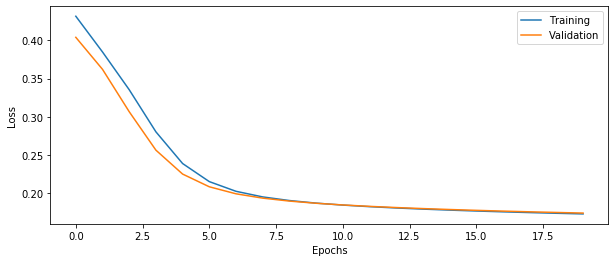

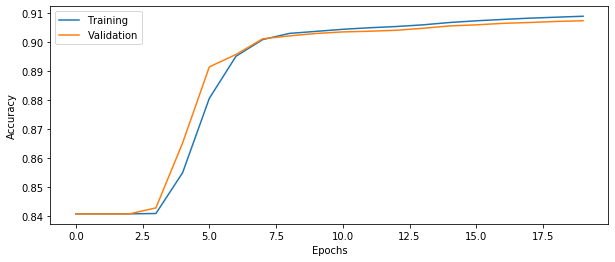

In [126]:
# Plot the history from the training run
plot_results(history1)

# Part 12: More questions

Question 9: What happens if you add several Dense layers without specifying the activation function?

<mark style="background-color: #eff0f1">Ans: All the Dense layers have linear activation fuction i.e( The nerual network will work like a linear
regression</mark>

Question 10: How are the weights in each dense layer initialized as default? How are the bias weights initialized?

<mark style="background-color: #eff0f1">Ans: All the bias and inital weights are initialized randomly</mark>

# Part 13: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [123]:
from sklearn.utils import class_weight

# Calculate class weights
cw = class_weight.compute_class_weight("balanced", np.unique(Ytest), Y)

# Print the class weights
cw

array([3.14146817, 0.59464434])

### 2 layers, 20 nodes, class weights

In [127]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 20

# Build the model
model2 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1)

# Train the model, provide training data and validation data
history2 = model2.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4686 - accuracy: 0.8024 - val_loss: 0.4103 - val_accuracy: 0.8406
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3900 - accuracy: 0.8407 - val_loss: 0.3663 - val_accuracy: 0.8406
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3397 - accuracy: 0.8407 - val_loss: 0.3107 - val_accuracy: 0.8406
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2840 - accuracy: 0.8407 - val_loss: 0.2590 - val_accuracy: 0.8407
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2407 - accuracy: 0.8524 - val_loss: 0.2258 - val_accuracy: 0.8593
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2156 - accuracy: 0.8727 - val_loss: 0.2081 - val_accuracy: 0.8833
Epoch 7/20
534895/534895 [==============================] - 

In [128]:
# Evaluate model on test data
score = model2.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 1s 9us/step
Test loss: 0.1721
Test accuracy: 0.9075


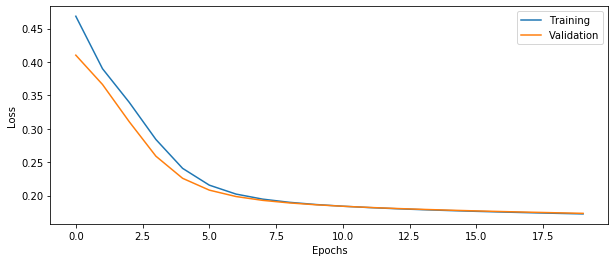

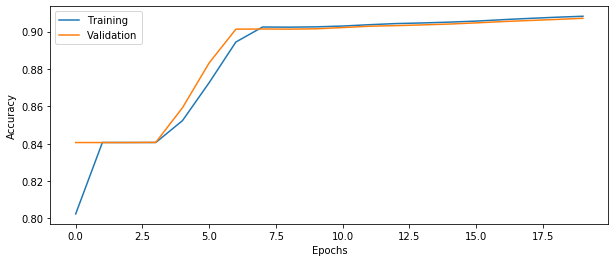

In [129]:
plot_results(history2)

# Part 14: More questions

Question 11: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

Question 13: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

Question 14: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

Question 15: What limits how large the batch size can be?

Question 16: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

# Part 15: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 17: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

### 4 layers, 20 nodes, class weights

In [150]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 4
n_nodes = 20

# Build the model
model3 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1)

# Train the model, provide training data and validation data
history3 = model3.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4470 - accuracy: 0.8407 - val_loss: 0.4387 - val_accuracy: 0.8406
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4386 - accuracy: 0.8407 - val_loss: 0.4386 - val_accuracy: 0.8406
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4384 - accuracy: 0.8407 - val_loss: 0.4384 - val_accuracy: 0.8406
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4383 - accuracy: 0.8407 - val_loss: 0.4382 - val_accuracy: 0.8406
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4381 - accuracy: 0.8407 - val_loss: 0.4381 - val_accuracy: 0.8406
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4380 - accuracy: 0.8407 - val_loss: 0.4379 - val_accuracy: 0.8406
Epoch 7/20
534895/534895 [==============================] - 

In [152]:
# Evaluate model on test data
score = model3.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 1s 13us/step
Test loss: 0.4319
Test accuracy: 0.8418


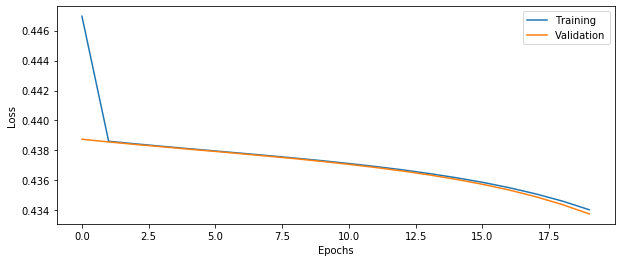

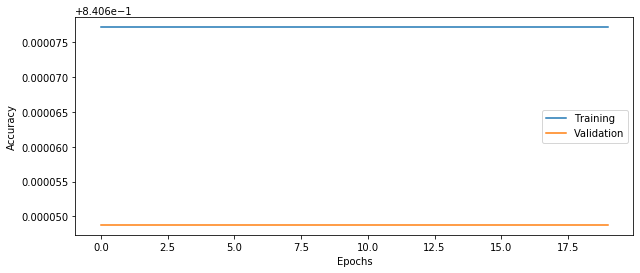

In [153]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [154]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 50

# Build the model
model4 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1)

# Train the model, provide training data and validation data
history4 = model4.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4366 - accuracy: 0.8407 - val_loss: 0.4072 - val_accuracy: 0.8406
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3857 - accuracy: 0.8407 - val_loss: 0.3614 - val_accuracy: 0.8406
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3353 - accuracy: 0.8407 - val_loss: 0.3076 - val_accuracy: 0.8406
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2829 - accuracy: 0.8407 - val_loss: 0.2601 - val_accuracy: 0.8406
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2432 - accuracy: 0.8519 - val_loss: 0.2293 - val_accuracy: 0.8575
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2193 - accuracy: 0.8756 - val_loss: 0.2119 - val_accuracy: 0.8908
Epoch 7/20
534895/534895 [==============================] - 

In [155]:
# Evaluate model on test data
score = model4.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 1s 12us/step
Test loss: 0.1720
Test accuracy: 0.9074


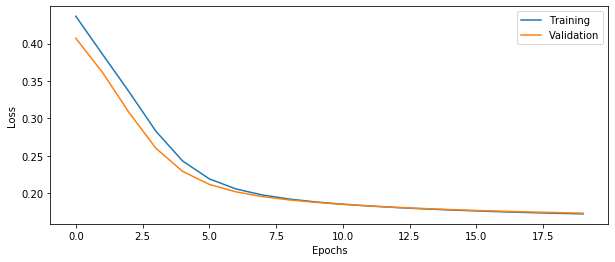

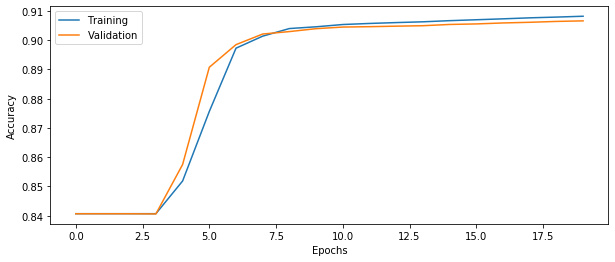

In [156]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [157]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 4
n_nodes = 50

# Build the model
model5 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1)

# Train the model, provide training data and validation data
history5 = model5.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 3us/step - loss: 0.4481 - accuracy: 0.8407 - val_loss: 0.4387 - val_accuracy: 0.8406
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4386 - accuracy: 0.8407 - val_loss: 0.4385 - val_accuracy: 0.8406
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4384 - accuracy: 0.8407 - val_loss: 0.4383 - val_accuracy: 0.8406
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4382 - accuracy: 0.8407 - val_loss: 0.4382 - val_accuracy: 0.8406
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4380 - accuracy: 0.8407 - val_loss: 0.4380 - val_accuracy: 0.8406
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4378 - accuracy: 0.8407 - val_loss: 0.4378 - val_accuracy: 0.8406
Epoch 7/20
534895/534895 [==============================] - 

In [158]:
# Evaluate model on test data
score = model5.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 1s 13us/step
Test loss: 0.4307
Test accuracy: 0.8418


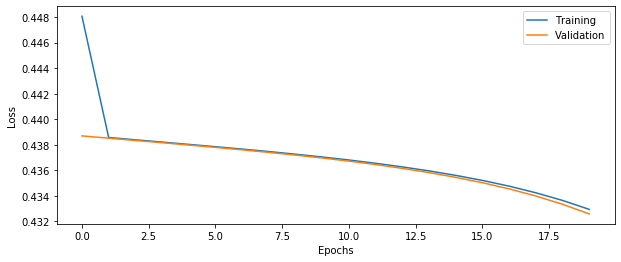

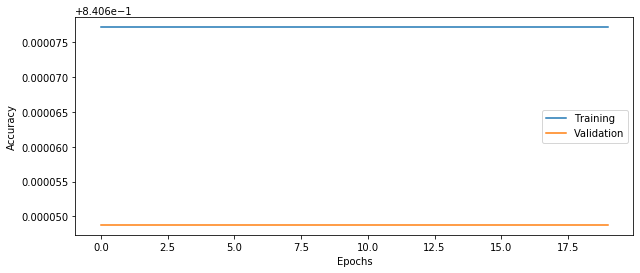

In [159]:
plot_results(history5)

# Part 16: Batch normalization

Now add batch normalization after each dense layer. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 18: Why is batch normalization important when training deep networks?

### 2 layers, 20 nodes, class weights, batch normalization

In [187]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 20

# Build the model
model6 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1,use_bn = True)

# Train the model, provide training data and validation data
history6 = model6.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.2979 - accuracy: 0.8888 - val_loss: 0.4109 - val_accuracy: 0.8406
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1871 - accuracy: 0.9120 - val_loss: 0.4188 - val_accuracy: 0.8406
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1719 - accuracy: 0.9139 - val_loss: 0.3933 - val_accuracy: 0.8406
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1655 - accuracy: 0.9146 - val_loss: 0.3364 - val_accuracy: 0.8406
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1618 - accuracy: 0.9155 - val_loss: 0.2738 - val_accuracy: 0.8407
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1594 - accuracy: 0.9161 - val_loss: 0.2198 - val_accuracy: 0.8494
Epoch 7/20
534895/534895 [==============================] - 

In [188]:
# Evaluate model on test data
score = model6.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 2s 22us/step
Test loss: 0.1505
Test accuracy: 0.9173


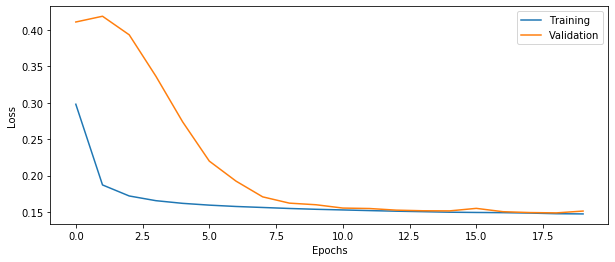

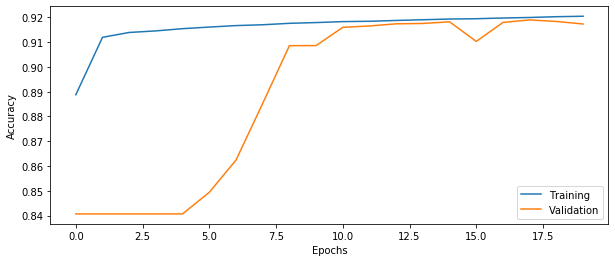

In [189]:
plot_results(history6)

# Part 17: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [168]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 20

# Build the model
model7 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1,act_fun = "relu")

# Train the model, provide training data and validation data
history7 = model7.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 2.5391 - accuracy: 0.0071 - val_loss: 2.5404 - val_accuracy: 0.0051
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 2.5400 - accuracy: 0.0052 - val_loss: 2.5404 - val_accuracy: 0.0051
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 2.5400 - accuracy: 0.0052 - val_loss: 2.5404 - val_accuracy: 0.0051
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 2.5400 - accuracy: 0.0052 - val_loss: 2.5404 - val_accuracy: 0.0051
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 2.5400 - accuracy: 0.0052 - val_loss: 2.5404 - val_accuracy: 0.0051
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 2.5400 - accuracy: 0.0051 - val_loss: 2.5404 - val_accuracy: 0.0051
Epoch 7/20
534895/534895 [==============================] - 

In [169]:
# Evaluate model on test data
score =  model7.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 2s 15us/step
Test loss: 2.5224
Test accuracy: 0.0053


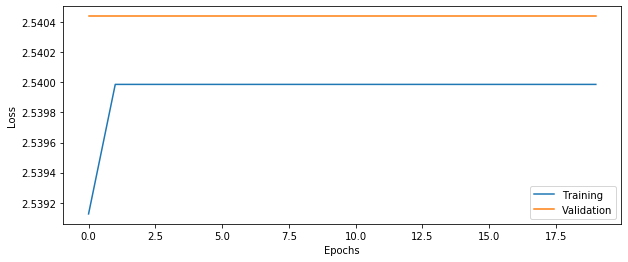

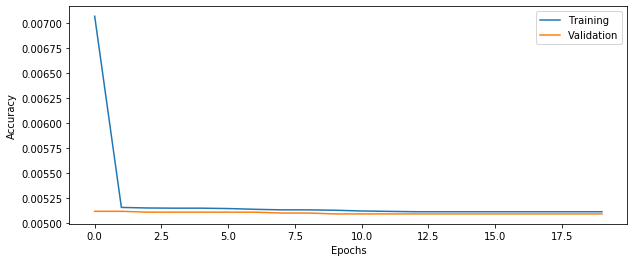

In [170]:
plot_results(history7)

# Part 18: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [190]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 20

# Build the model
model8 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1,optimizer = "Adam")

# Train the model, provide training data and validation data
history8 = model8.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 3us/step - loss: 0.1862 - accuracy: 0.8997 - val_loss: 0.1592 - val_accuracy: 0.9151
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1544 - accuracy: 0.9186 - val_loss: 0.1516 - val_accuracy: 0.9197
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1478 - accuracy: 0.9209 - val_loss: 0.1465 - val_accuracy: 0.9207
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1435 - accuracy: 0.9221 - val_loss: 0.1448 - val_accuracy: 0.9208
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1400 - accuracy: 0.9240 - val_loss: 0.1378 - val_accuracy: 0.9246
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1389 - accuracy: 0.9247 - val_loss: 0.1402 - val_accuracy: 0.9219
Epoch 7/20
534895/534895 [==============================] - 

In [191]:
# Evaluate model on test data
score = model8.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 2s 20us/step
Test loss: 0.1216
Test accuracy: 0.9339


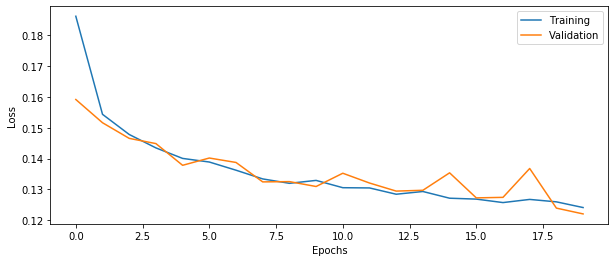

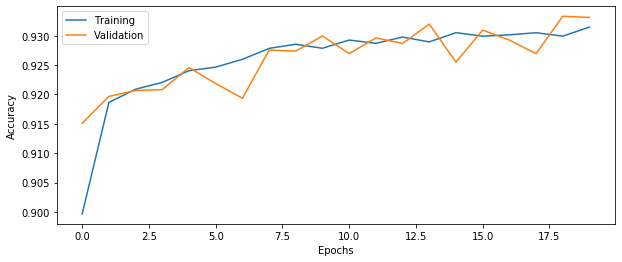

In [192]:
plot_results(history8)

# Part 19: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer), with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/layers/core/ for how the Dropout layer works.

---

Question 19: How does the validation accuracy change when adding dropout?

Question 20: How does the test accuracy change when adding dropout?

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [196]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 20

# Build the model
model9 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1,use_dropout = True)

# Train the model, provide training data and validation data
history9 = model9.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.5248 - accuracy: 0.7822 - val_loss: 0.4217 - val_accuracy: 0.8406
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4432 - accuracy: 0.8377 - val_loss: 0.3928 - val_accuracy: 0.8406
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4135 - accuracy: 0.8399 - val_loss: 0.3666 - val_accuracy: 0.8406
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3894 - accuracy: 0.8407 - val_loss: 0.3385 - val_accuracy: 0.8406
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3652 - accuracy: 0.8419 - val_loss: 0.3096 - val_accuracy: 0.8406
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3425 - accuracy: 0.8449 - val_loss: 0.2820 - val_accuracy: 0.8406
Epoch 7/20
534895/534895 [==============================] - 

In [197]:
# Evaluate model on test data
score = model8.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 2s 17us/step
Test loss: 0.1837
Test accuracy: 0.9027


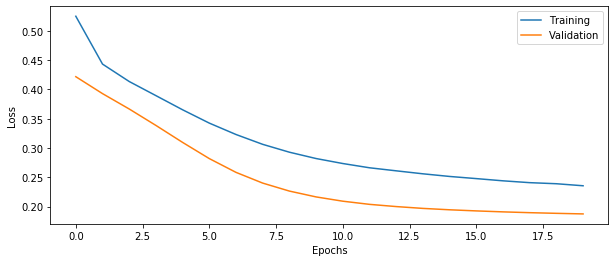

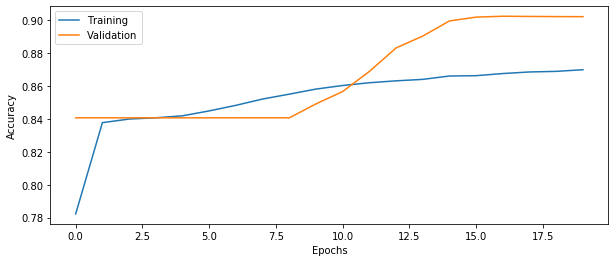

In [198]:
plot_results(history9)

# Part 20: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 21: How high classification accuracy can you achieve for the test data? What is your best configuration?

In [235]:
# Setup some training parameters
batch_size = 500
epochs = 23

input_shape = (X.shape[1],)
n_layers = 3
n_nodes = 100

# Build the model
model10 = build_DNN(input_shape, n_layers, n_nodes, learning_rate = 0.01, use_bn = True, optimizer = "Adam")

# Train the model, provide training data and validation data
history10 = model10.fit(Xtrain, Ytrain, epochs = epochs, validation_data = (Xval,Yval), batch_size = batch_size, class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/23
534895/534895 [==============================] - 7s 12us/step - loss: 0.1590 - accuracy: 0.9147 - val_loss: 0.1518 - val_accuracy: 0.9190
Epoch 2/23
534895/534895 [==============================] - 5s 8us/step - loss: 0.1423 - accuracy: 0.9198 - val_loss: 0.1508 - val_accuracy: 0.9234
Epoch 3/23
534895/534895 [==============================] - 5s 9us/step - loss: 0.1291 - accuracy: 0.9289 - val_loss: 0.1249 - val_accuracy: 0.9322
Epoch 4/23
534895/534895 [==============================] - 5s 8us/step - loss: 0.1219 - accuracy: 0.9331 - val_loss: 0.1167 - val_accuracy: 0.9365
Epoch 5/23
534895/534895 [==============================] - 5s 8us/step - loss: 0.1185 - accuracy: 0.9349 - val_loss: 0.1184 - val_accuracy: 0.9342
Epoch 6/23
534895/534895 [==============================] - 5s 8us/step - loss: 0.1162 - accuracy: 0.9366 - val_loss: 0.1155 - val_accuracy: 0.9369
Epoch 7/23
534895/534895 [==============================] -

In [257]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest,Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 6s 49us/step
Test loss: 0.1122
Test accuracy: 0.9414


# Part 21: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 22: What is the mean and the standard deviation of the test accuracy?

In [245]:
import keras
import keras.backend as K
class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [261]:
# Setup some training parameters
batch_size = 500
epochs = 23

input_shape = (X.shape[1],)
n_layers = 3
n_nodes = 100

# Build the model
model11 = build_DNN(input_shape, n_layers, n_nodes, learning_rate = 0.01, use_bn = True, optimizer = "Adam",use_custom_dropout = True)

# Train the model, provide training data and validation data
history11 = model11.fit(Xtrain, Ytrain, epochs = epochs, validation_data = (Xval,Yval), batch_size = batch_size, class_weight = cw)

Train on 534895 samples, validate on 114621 samples
Epoch 1/23
534895/534895 [==============================] - 8s 14us/step - loss: 0.1808 - accuracy: 0.9065 - val_loss: 0.1635 - val_accuracy: 0.9139
Epoch 2/23
534895/534895 [==============================] - 5s 10us/step - loss: 0.1642 - accuracy: 0.9130 - val_loss: 0.1613 - val_accuracy: 0.9150
Epoch 3/23
534895/534895 [==============================] - 5s 10us/step - loss: 0.1623 - accuracy: 0.9144 - val_loss: 0.1614 - val_accuracy: 0.9140
Epoch 4/23
534895/534895 [==============================] - 5s 10us/step - loss: 0.1615 - accuracy: 0.9150 - val_loss: 0.1614 - val_accuracy: 0.9147
Epoch 5/23
534895/534895 [==============================] - 5s 10us/step - loss: 0.1606 - accuracy: 0.9155 - val_loss: 0.1608 - val_accuracy: 0.9150
Epoch 6/23
534895/534895 [==============================] - 5s 10us/step - loss: 0.1599 - accuracy: 0.9161 - val_loss: 0.1606 - val_accuracy: 0.9147
Epoch 7/23
534895/534895 [============================

In [265]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working
#use_custom_dropout
# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest)
                       
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 5s 46us/step
Test accuracy: 0.9178


In [ ]:
# Run the testing 100 times, and save the accuracies in an array
accuracy_array = np.empty(100)
for i in range(100):
    score = model11.evaluate(Xtest,Ytest,verbose = 0)
    accuracy_array[i] = score[1]
    
    
# Calculate and print mean and std of accuracies

print(f"mean : {np.mean(accuracy_array)}")
print(f"STD : {np.std(accuracy_array)}")

# Part 22: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 23: What is the mean and the standard deviation of the test accuracy?

Question 24: What is the main advantage of dropout compared to CV for estimating test uncertainty?

In [284]:
from sklearn.model_selection import StratifiedKFold

batch_size = 500
epochs = 23

input_shape = (X.shape[1],)
n_layers = 3
n_nodes = 100
accuracy_array1 = np.empty(10)
# Define 10-fold cross validation
KForlds = StratifiedKFold(10,True,1234)
index = 0
# Loop over cross validation folds
for train_index, test_index in KForlds.split(X, Y):
    print(f"K  = {index + 1}")
    newXtrain = X[train_index,:]
    newYtrain = Y[train_index]
        
    newXtest = X[test_index,:]
    newYtest = Y[test_index]
    
    # Calculate class weights for current split
    cw = class_weight.compute_class_weight("balanced", np.unique(newYtrain), newYtrain)
    
    # Rebuild the DNN model, to not continue training on the previously trained model
    model = build_DNN(input_shape, n_layers, n_nodes, learning_rate = 0.01, use_bn = True, optimizer = "Adam")
       
    # Fit the model with training set and class weights for this fold
    history11 = model.fit(newXtrain, newYtrain, epochs = epochs, batch_size = batch_size, class_weight = cw,verbose = 0)
    
    # Evaluate the model using the test set for this fold
    score = model.evaluate(Xtest,Ytest,verbose = 0)
    
    # Save the test accuracy in an array
    accuracy_array1[index] = score[1]
    
    index = index + 1


# Calculate and print mean and std of accuracies



K  = 1
K  = 2
K  = 3
K  = 4
K  = 5
K  = 6
K  = 7
K  = 8
K  = 9
K  = 10


In [286]:
# Calculate and print mean and std of accuracies
print(f"mean : {np.mean(accuracy_array1)}")
print(f"STD : {np.std(accuracy_array1)}")


mean : 0.9337390124797821
STD : 0.005515730834053388


# Part 23: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 25: How would you change the DNN in order to use it for regression instead?

## Report

Send in this jupyter notebook, with answers to all questions.